In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from scipy import stats

truckTwoPath = "../data/trucks/truck1.csv"

truckTwoDictPath = "../data/dictionary/truck1_data_dictionary.csv"

In [2]:
def get_truck_data():
    trucks1 = pd.read_csv(os.path.join('../data/trucks/truck1.csv'),
               sep=',',engine='python')
    
    return trucks1

In [3]:
trucks1 = get_truck_data()

In [4]:
def readCsv(truck):
    return pd.read_csv(truck, header = [0])
    
def cullUtcCols(truckData):
    noUTC = truckData.drop(["UTC hour", "UTC minute", "UTC second", "UTC month", "UTC day", "UTC year"], axis = 1)
    return noUTC

"""Takes a DataFrame and a conversion dictionary as parameters;
    uses the dictionary to rename all matching columns then returns the changed DataFrame."""
def renameColumns(dataFrame, dictionary):
    return dataFrame.rename(columns = dictionary)

"""Finds threshold of Non-NA type using percentage and deletes rows."""

#If the number of values that are NOT Na type pass this percentage, the row will be deleted
rowNaNThresholdPercent = 75
def removeUnnecessaryRows(dataFrame):
    length = len(dataFrame.columns)
    TValue = (rowNaNThresholdPercent / 100) * length
    print("Threshold value: " + str(int(TValue)))
    return dataFrame.dropna(thresh = int(TValue))

"""Finds columns with all Na types and deletes them."""
def removeUnnecessaryColumns(dataFrame):
    return dataFrame.dropna(axis=1, how='all')

# NOTE: The following function is unused in this notebook, but it can be used to convert CSV files into
# conversion dictionaries i.e. creating the column rename dictionaries, which was manually done in the
# previous block manually.

"""Creates a Python dictionary from a pre-defined CSV dictionary.
This will only look at the first two columns of the given CSV file."""
def createPythonDictionary(dictionaryCSV):
    # Initialize the resulting dictionary.
    dictResult = {}
    
    # Opens the passed in CSV which defines the rename dictionary and iterates through it to store each value into a Python dictionary.
    with open(dictionaryCSV, 'r') as f:
        for row in csv.reader(f):
            dictResult.update({row[0]:row[1]})
    return dictResult



In [5]:
trucks1 = removeUnnecessaryColumns(trucks1)

In [6]:
trucks1 = removeUnnecessaryRows(trucks1)

Threshold value: 35


In [33]:
trucks1.head()

,Time,1730_CH9_ AutomaticStartStop,1730_CH10_Truck_Batteries,4649_Ch1_Alternator_250A,4649_Ch2_BattOut_100A,4649_Ch3_Trailer_50A,4649_Ch4_Inverter_100A,4649_Ch5_Fridge_50A,4649_Ch6_200A_APU_BatteryBank,4649_Ch7_200A_BatterySeparator,...,WheelBasedVehicleSpeed,CPU load,UTC hour,UTC minute,UTC second,UTC month,UTC day,UTC year,GPS altitude,GPS speed
16,08/07/2019 07:54:04.559,0.006409,13.946441,97.500381,27.971695,0.277523,1.337072,0.145914,-0.033379,0.843061,...,8.167969,40.0,11.0,54.0,4.0,8.0,7.0,19.0,0.0,6.1116
17,08/07/2019 07:54:04.659,0.007782,13.953765,96.985389,22.375448,0.275616,5.640116,0.134470,-0.004768,0.774395,...,8.167969,40.0,11.0,54.0,4.0,8.0,7.0,19.0,0.0,6.1116
18,08/07/2019 07:54:04.759,0.007782,13.956970,98.330091,18.987945,0.273709,1.287480,0.126841,-0.014305,0.736248,...,8.167969,40.0,11.0,54.0,4.0,8.0,7.0,19.0,0.0,6.1116
19,08/07/2019 07:54:04.859,0.007324,13.953307,94.076638,19.071870,0.277523,6.105516,0.136378,-0.071527,0.774395,...,8.117188,88.0,11.0,54.0,5.0,8.0,7.0,19.0,0.0,6.6672
20,08/07/2019 07:54:04.959,0.007324,13.957885,96.365492,21.677348,0.264172,3.751812,0.128748,-0.071527,0.759136,...,7.820312,88.0,11.0,54.0,5.0,8.0,7.0,19.0,0.0,6.6672


In [7]:
trucks1['EngineAirIntakeTemp_BB1_X_E'].mean()

27.59693043150082

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000010606FFD0>]],
      dtype=object)

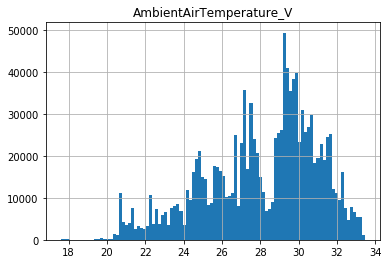

In [8]:
trucks1.hist(column="AmbientAirTemperature_V", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009954B38>]],
      dtype=object)

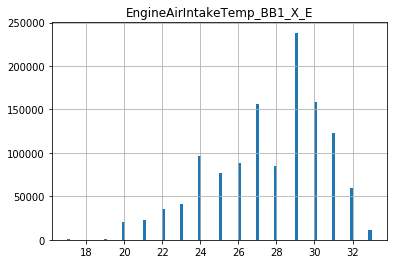

In [9]:
trucks1.hist(column="EngineAirIntakeTemp_BB1_X_E", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000259711D0>]],
      dtype=object)

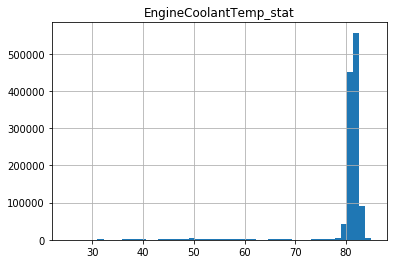

In [10]:
trucks1.hist(column='EngineCoolantTemp_stat', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000001030D77F0>]],
      dtype=object)

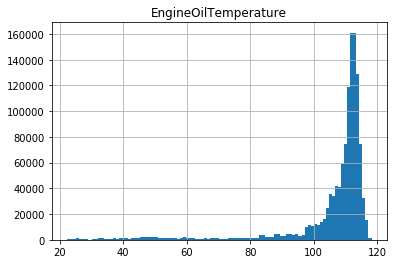

In [11]:
trucks1.hist(column='EngineOilTemperature', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000DACC7908>]],
      dtype=object)

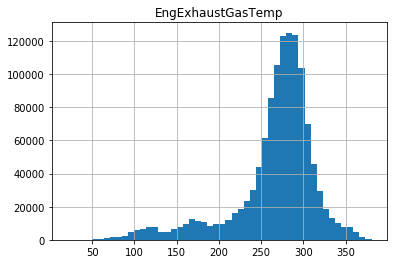

In [12]:
trucks1.hist(column='EngExhaustGasTemp', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000100AC9080>]],
      dtype=object)

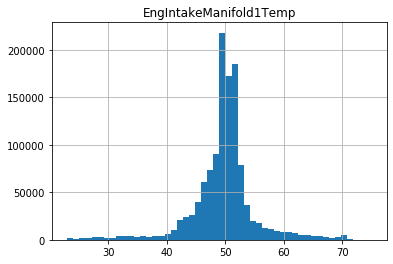

In [13]:
trucks1.hist(column='EngIntakeManifold1Temp', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000FCBA4A20>]],
      dtype=object)

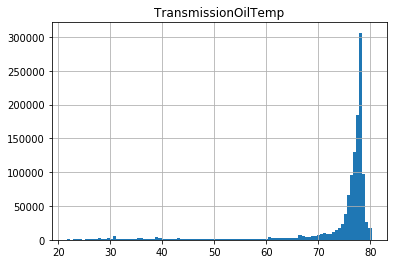

In [14]:
trucks1.hist(column='TransmissionOilTemp', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000FCBB1CC0>]],
      dtype=object)

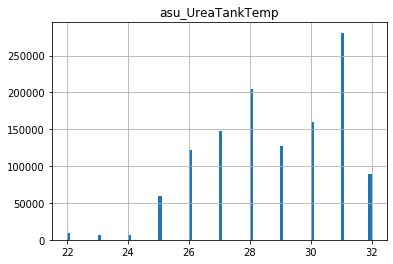

In [15]:
trucks1.hist(column='asu_UreaTankTemp', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000FA4DDDD8>]],
      dtype=object)

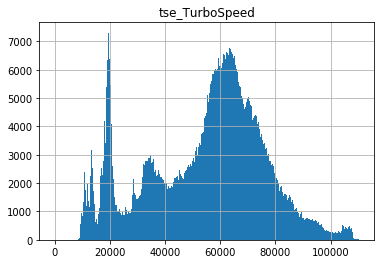

In [16]:
trucks1.hist(column='tse_TurboSpeed', bins=500)

In [17]:
trucks1['tse_TurboSpeed'].mean()

54876.66593589009

In [175]:
truck = trucks1['tse_TurboSpeed']

In [73]:
airintake = trucks1['EngineAirIntakeTemp_BB1_X_E']

In [86]:
oiltemp = trucks1['EngineOilTemperature']

In [95]:
urea = trucks1['asu_UreaTankTemp']

In [102]:
coolant = trucks1['EngineCoolantTemp_stat']

In [108]:
exhaust = trucks1['EngExhaustGasTemp']

In [121]:
manifold = trucks1['EngIntakeManifold1Temp']

In [128]:
transmission = trucks1['TransmissionOilTemp']

In [208]:
truck1 = trucks1[['AmbientAirTemperature_V']].ffill().bfill()

In [20]:
truck3 = trucks1[['EngineAirIntakeTemp_BB1_X_E']].ffill().bfill()

In [209]:
truck = trucks1[['tse_TurboSpeed']].ffill().bfill()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000D9308B38>]],
      dtype=object)

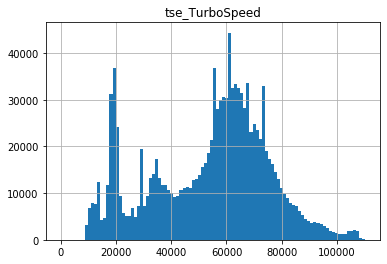

In [159]:
truck.hist(column='tse_TurboSpeed', bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000DBA5B9E8>]],
      dtype=object)

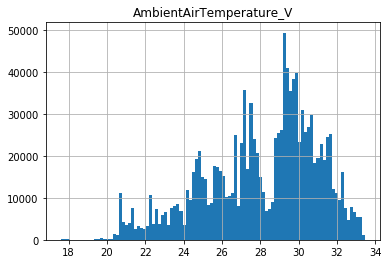

In [160]:
truck1.hist(column='AmbientAirTemperature_V', bins=100)

In [161]:
truck['tse_TurboSpeed'].mean()

54301.48128194424

In [25]:
truck1['AmbientAirTemperature_V'].mean()

28.080522496561002

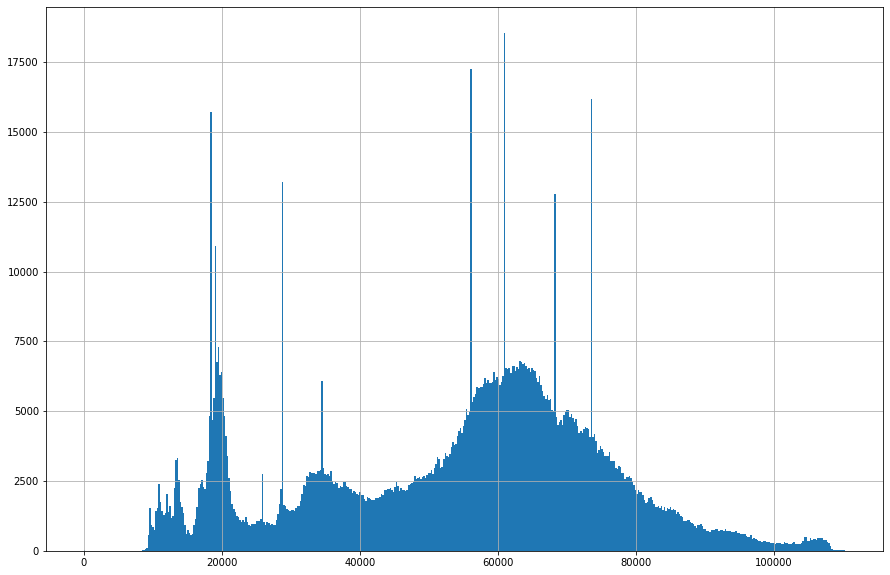

In [27]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
truck.tse_TurboSpeed.hist(bins=500, ax=ax)

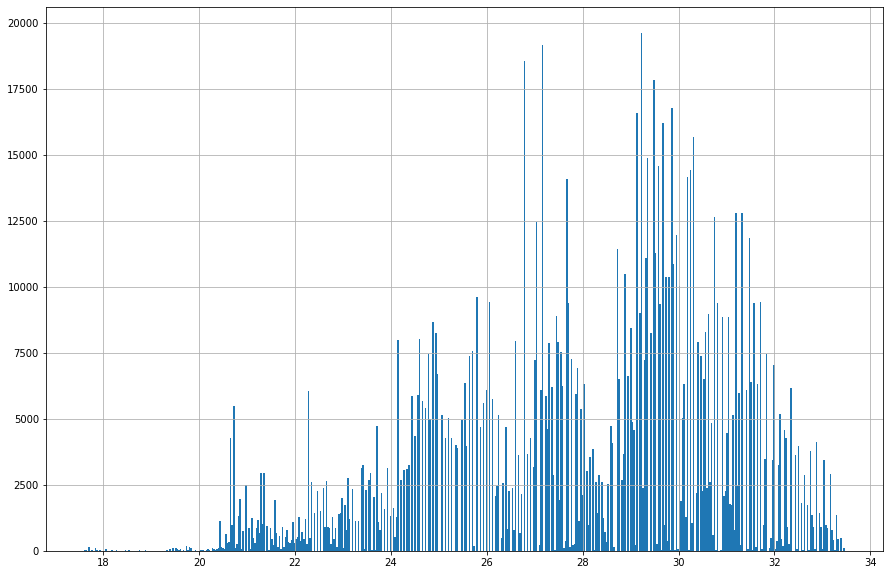

In [32]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
truck1.AmbientAirTemperature_V.hist(bins=500, ax=ax)

In [36]:
truck.corr()

,tse_TurboSpeed
tse_TurboSpeed,1.0


In [48]:
df = pd.concat([truck, truck1], axis=0, join='outer',ignore_index=False, keys=None, levels=None)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [206]:
df = [truck, truck1]


In [215]:
result = pd.concat([truck, truck1, airintake, oiltemp, coolant, exhaust, manifold, transmission], axis=1, sort=False)

In [216]:
result.head()

,tse_TurboSpeed,AmbientAirTemperature_V,EngineAirIntakeTemp_BB1_X_E,EngineOilTemperature,EngineCoolantTemp_stat,EngExhaustGasTemp,EngIntakeManifold1Temp,TransmissionOilTemp
16,25049.353516,21.34375,21.0,26.65625,31.0,70.62500,27.0,27.84375
17,25049.353516,21.34375,21.0,26.65625,31.0,71.84375,27.0,27.84375
18,25049.353516,21.34375,21.0,26.65625,31.0,71.84375,27.0,27.84375
19,25049.353516,21.34375,21.0,26.65625,31.0,71.84375,27.0,27.84375
20,25049.353516,21.34375,21.0,26.65625,31.0,71.84375,27.0,27.84375


In [217]:
correlations = result.corr()

In [218]:
correlations

,tse_TurboSpeed,AmbientAirTemperature_V,EngineAirIntakeTemp_BB1_X_E,EngineOilTemperature,EngineCoolantTemp_stat,EngExhaustGasTemp,EngIntakeManifold1Temp,TransmissionOilTemp
tse_TurboSpeed,1.000000,0.051154,0.052106,0.273175,0.231088,0.653213,-0.270149,0.155856
AmbientAirTemperature_V,0.051154,1.000000,0.995044,0.334933,0.276370,0.182330,0.533735,0.356249
EngineAirIntakeTemp_BB1_X_E,0.052106,0.995044,1.000000,0.334156,0.275390,0.182946,0.529265,0.355307
EngineOilTemperature,0.273175,0.334933,0.334156,1.000000,0.869863,0.552278,0.476385,0.947928
EngineCoolantTemp_stat,0.231088,0.276370,0.275390,0.869863,1.000000,0.579996,0.575601,0.835591
EngExhaustGasTemp,0.653213,0.182330,0.182946,0.552278,0.579996,1.000000,-0.116094,0.392420
EngIntakeManifold1Temp,-0.270149,0.533735,0.529265,0.476385,0.575601,-0.116094,1.000000,0.618264
TransmissionOilTemp,0.155856,0.356249,0.355307,0.947928,0.835591,0.392420,0.618264,1.000000


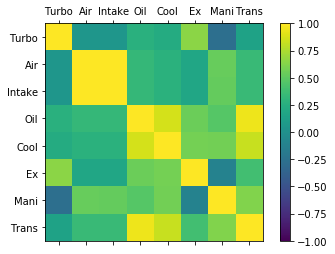

In [219]:
fig = plt.figure()
ax = fig.add_subplot(111)
names = ['Turbo', 'Air', 'Intake', 'Oil', 'Cool', 'Ex', 'Mani', 'Trans']
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,8,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [203]:
point_estimates = []         # Make empty list to hold point estimates

for x in range(0,1000):         # Generate 200 samples
    
    point_estimates.append(trucks1['tse_TurboSpeed'].sample(n=500).mean())


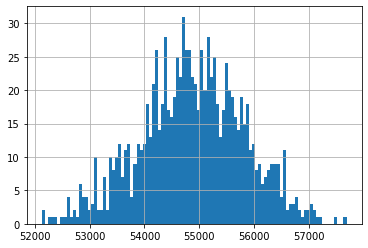

In [204]:
pd.Series(point_estimates).hist(bins=100)

In [195]:
trucks1['tse_TurboSpeed'].mean()

54876.66593589009

In [182]:
truckturbo = truck.set_index('tse_TurboSpeed', inplace=True)

KeyError: 'tse_TurboSpeed'

In [184]:
truckturbo

In [194]:
truck

""
tse_TurboSpeed
25049.353516
25049.353516
25049.353516
25049.353516
25049.353516
25049.353516
25049.353516
25049.353516
25049.353516
